In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('2d_web.npy', 'rb') as f:
    rawData = np.load(f)

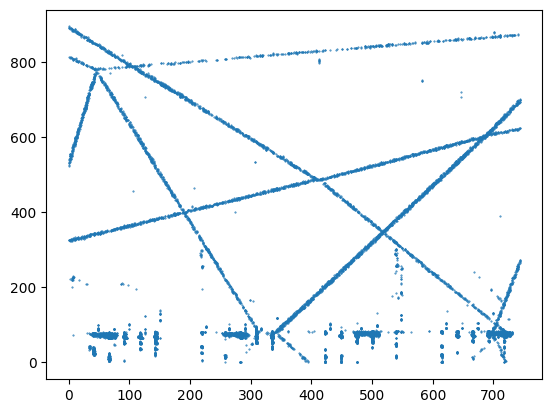

In [42]:
dsFactor = 15
order = np.arange(rawData.shape[0])
np.random.shuffle(order)
scatterPoints = rawData[order][::dsFactor,:]

plt.scatter(scatterPoints[:,2], scatterPoints[:,1], s=.2)
plt.show()

In [43]:
# Construct the adjacency matrix
distanceMat = np.zeros((scatterPoints.shape[0], scatterPoints.shape[0]))

# Calculate node-node distances
for i in range(scatterPoints.shape[-1]):
    distanceMat += np.subtract.outer(scatterPoints[:,i], scatterPoints[:,i])**2
    
distanceMat = np.sqrt(distanceMat)

In [44]:
contactRadius = 5
weightedAdjMat = np.where(distanceMat < contactRadius, distanceMat, 0)
unweightedAdjMat = np.where(weightedAdjMat, 1, 0)

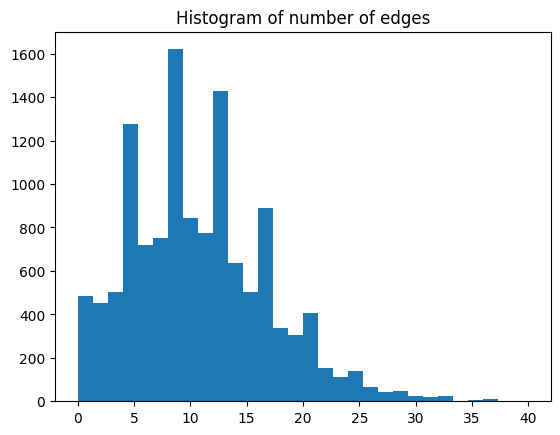

In [45]:
plt.hist(np.sum(unweightedAdjMat, axis=0), bins=30)
plt.title('Histogram of number of edges')
plt.show()